# Generating Low Resolution Images

## Imports

In [1]:
from PIL import Image
import os
import torch
from torch import nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Loading images

In [2]:
TYPE = 'input'
SET = 'test'

In [3]:
%time
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path)
            images.append(img)
    return images

folder_path = f"D:/SD7K/Shadoc/{SET}/{TYPE}"
loaded_images = load_images_from_folder(folder_path)[:10]

Wall time: 0 ns


In [4]:
print(len(loaded_images))
print(type(loaded_images[0]))
print(loaded_images[0].size)

10
<class 'PIL.PngImagePlugin.PngImageFile'>
(2405, 3705)


In [5]:
transform = transforms.Compose([
    # transforms.Resize((768,1024)),
    transforms.ToTensor(),           # Convert images to tensors
])

In [6]:
# Convert PIL images to tensors
%time
tensor_images = [transform(img) for img in loaded_images]
tensor_images = torch.stack(tensor_images)

Wall time: 0 ns


In [7]:
print(len(tensor_images))
print(type(tensor_images[0]))
print(tensor_images[0].shape)

10
<class 'torch.Tensor'>
torch.Size([3, 3705, 2405])


## Generating down-sampled images

In [8]:
L=3
I=[]
I.append(tensor_images)

for l in range(L):
    Il = nn.functional.interpolate(tensor_images,size=[I[-1].shape[2]//2,I[-1].shape[3]//2],mode='nearest-exact')
    I.append(Il)

In [9]:
print(I[-1].shape)
print(tensor_images.shape)

torch.Size([10, 3, 463, 300])
torch.Size([10, 3, 3705, 2405])


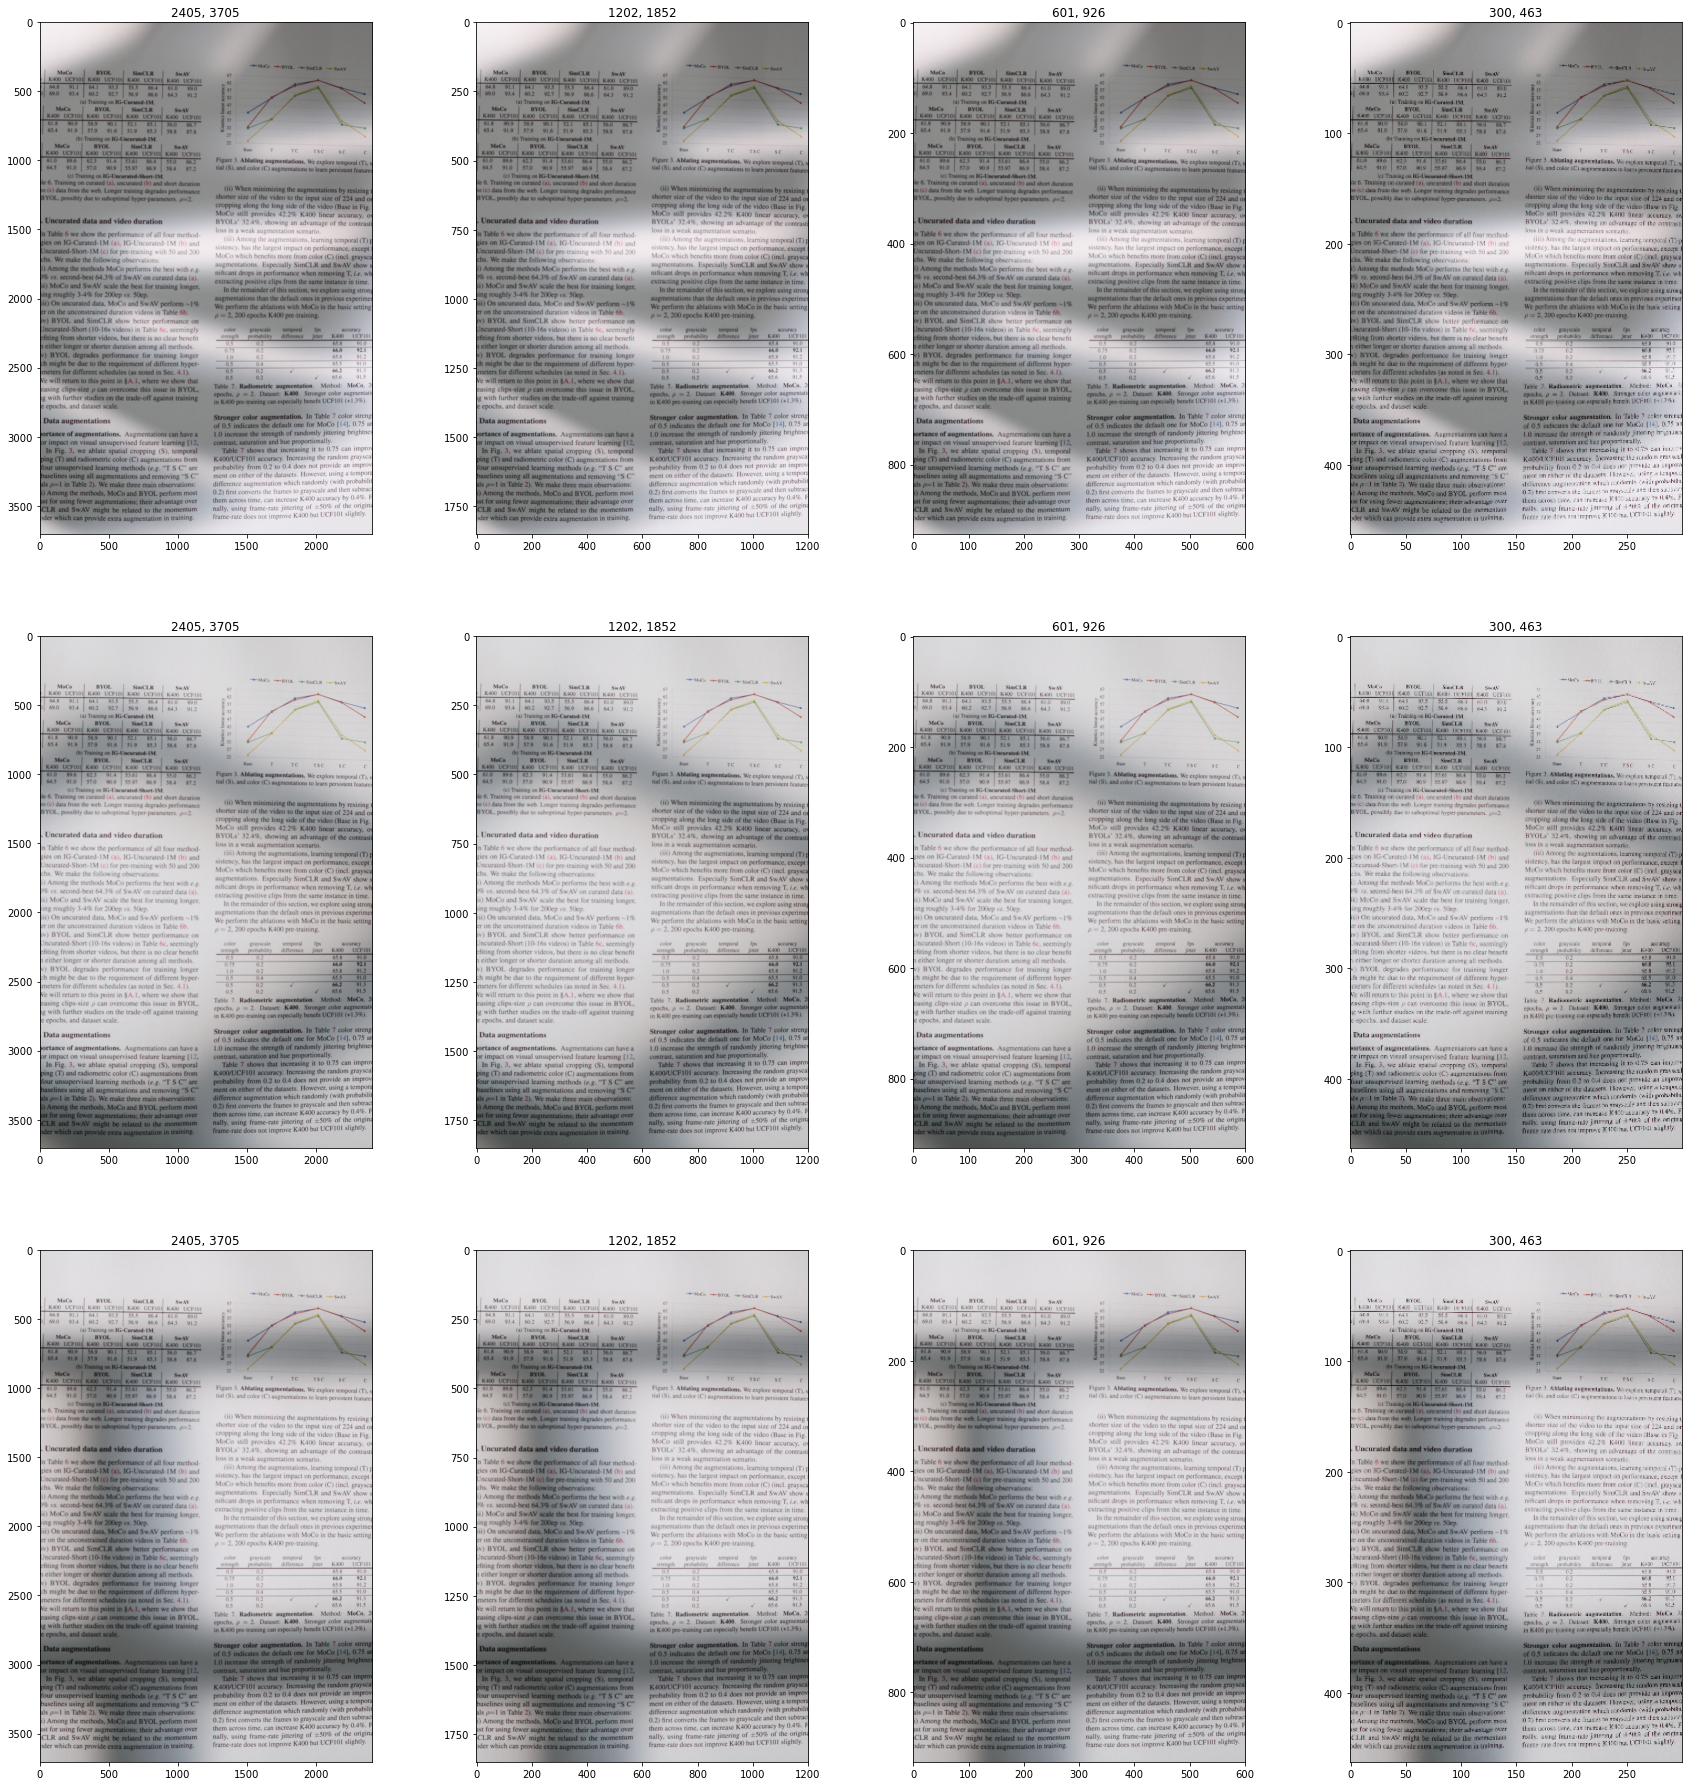

In [10]:
n_img=3
fig, axs = plt.subplots(n_img,L+1,figsize=(10*n_img, 8*(L+1)))

for i in range(n_img):
    for l in range(L+1):
        axs[i][l].set_title(f'{I[l][i].shape[2]}, {I[l][i].shape[1]}')
        axs[i][l].imshow(np.swapaxes(np.swapaxes(I[l][i],0, 2),0,1))


## Saving the generated images

In [11]:
def save_image(image_data,output_folder,name):

    image_data_scaled = (image_data * 255).astype(np.uint8)
    image = Image.fromarray(image_data_scaled)
    image.save(os.path.join(output_folder, f'{name}.png'))


In [12]:
for i,img_data_tensor in enumerate(I[-1]):
    low_res_folder = f"../lowres_SD7K/{img_data_tensor.shape[2]},{img_data_tensor.shape[1]}/{SET}/{TYPE}/"
    if not os.path.exists(low_res_folder):
        os.makedirs(low_res_folder)
    save_image(np.swapaxes(np.swapaxes(I[l][i],0, 2),0,1).numpy(),low_res_folder,f'{i}')